In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

## To Save Variables include the two lines after predictions
**Please Update ModelName to the appropriate model AND create directory inside the data folder**

1) np.savetxt("../data/ModelName/y_proba.csv", y_pred_proba, delimiter=",")

2) y_test.to_csv('../data/ModelName/y_test.csv', index=False)

## To Read Numpy Value y_pred_proba use the following:

In [9]:
y_pred_proba = np.genfromtxt('../data/log-regression/y_proba.csv',delimiter=',')
print(y_pred_proba)

[0.45939714 0.66251931 0.2179888  ... 0.8203808  0.6709399  0.54227111]


## As for y_test read as csv using pandas

In [10]:
y_test = pd.read_csv("../data/log-regression/y_test.csv")
print(y_test)

      LeaveOrNot
0              0
1              1
2              0
3              0
4              0
...          ...
1101           1
1102           1
1103           1
1104           1
1105           0

[1106 rows x 1 columns]


## Now a AUC Curve can be generated

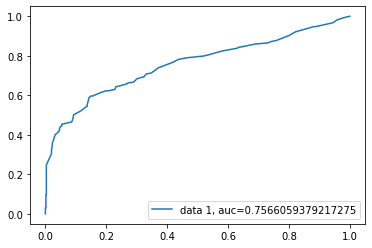

In [11]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [12]:
from sklearn.metrics import roc_curve

In [13]:
#import Log Data
y_pred_prob_log = np.genfromtxt('../data/log-regression/y_proba.csv', delimiter=',')
y_test_log = pd.read_csv("../data/log-regression/y_test.csv")
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred_prob_log)
auc_log = round(metrics.roc_auc_score(y_test, y_pred_prob_log),3)

#import Naive Bayes
y_pred_prob_nb = np.genfromtxt('../data/naive-bayes/y_proba.csv', delimiter=',')
y_test_nb = pd.read_csv("../data/naive-bayes/y_test.csv")
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred_prob_nb)
auc_nb = round(metrics.roc_auc_score(y_test, y_pred_prob_nb),3)

#import C5
y_pred_prob_c5 = np.genfromtxt('../data/c5/y_proba.csv', delimiter=',')
y_test_c5 = pd.read_csv("../data/c5/y_test.csv")
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_pred_prob_c5)
auc_c5 = round(metrics.roc_auc_score(y_test, y_pred_prob_c5),3)

#import RandomForest
y_pred_prob_rf = np.genfromtxt('../data/random-forest/y_proba.csv', delimiter=',')
y_test_rf = pd.read_csv("../data/random-forest/y_test.csv")
fpr4, tpr4, thresholds4 = roc_curve(y_test, y_pred_prob_rf)
auc_rf = round(metrics.roc_auc_score(y_test, y_pred_prob_rf),3)

#import Decision Tree
y_pred_prob_dt = np.genfromtxt('../data/decision-tree/y_proba.csv', delimiter=',')
y_test_dt = pd.read_csv("../data/decision-tree/y_test.csv")
fpr5, tpr5, thresholds5 = roc_curve(y_test, y_pred_prob_dt)
auc_dt = round(metrics.roc_auc_score(y_test, y_pred_prob_dt),3)

#import Baseline
y_pred_prob_base = np.genfromtxt('../data/baseline/y_proba.csv', delimiter=',')
y_test_base = pd.read_csv("../data/baseline/y_test.csv")
fpr6, tpr6, thresholds6 = roc_curve(y_test, y_pred_prob_base)
auc_base = round(metrics.roc_auc_score(y_test, y_pred_prob_base),3)

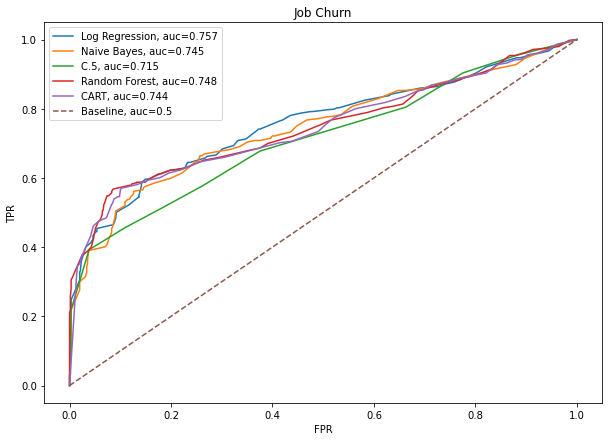

In [14]:
plt.figure(figsize=(10, 7))
plt.plot(fpr1, tpr1, label="Log Regression, auc="+str(auc_log))
plt.plot(fpr2, tpr2, label="Naive Bayes, auc="+str(auc_nb))
plt.plot(fpr3, tpr3, label="C.5, auc="+str(auc_c5))
plt.plot(fpr4, tpr4, label="Random Forest, auc="+str(auc_rf))
plt.plot(fpr5, tpr5, label="CART, auc="+str(auc_dt))
plt.plot(fpr6, tpr6, label="Baseline, auc="+str(auc_base), linestyle='--')

plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Job Churn')
plt.show()